# Market Microstructure Project

Ivanna Herrera Ibarra 744614

09/09/25

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize
from scipy.integrate import quad

## Price distribution

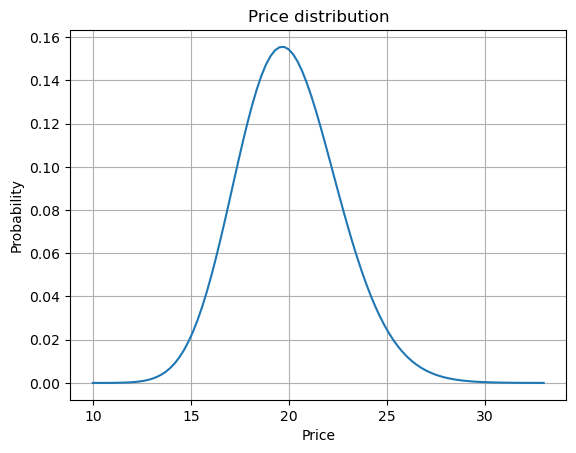

In [2]:
k = 60
lamb = 3
s = np.linspace(10, 33, 100)
pdf = (lamb**k * s**(k-1) * np.exp(-lamb * s)) / math.factorial(k-1)

plt.plot(s, pdf)
plt.title('Price distribution')
plt.xlabel('Price')
plt.ylabel('Probability')
plt.grid()
plt.show()

## Expected revenue

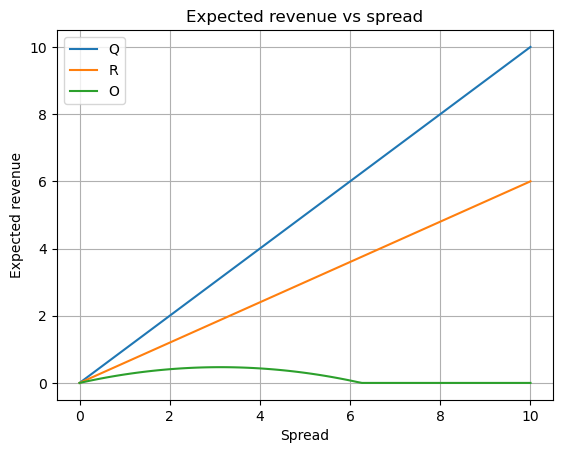

In [3]:
spread = np.linspace(0, 10, 100)
pi_l = 0.6
pi_bl = np.maximum(0.5 - 0.08 * spread, 0)


plt.plot(spread, spread, label='Q')
plt.plot(spread, spread * pi_l, label='R')
plt.plot(spread, spread * pi_l * pi_bl, label='O')
plt.title('Expected revenue vs spread')
plt.xlabel('Spread')
plt.ylabel('Expected revenue')
plt.grid()
plt.legend()
plt.show()

## Optimal bid/ask

In [4]:
def pdf(s):
    return (lamb**k * s**(k-1) * np.exp(-lamb * s)) / math.factorial(k-1)

def pi_bl(spread):
    return np.maximum(0.5 - 0.08 * spread, 0)

def pi_sl(spread):
    return np.maximum(0.5 - 0.08 * spread, 0)

pi_i = 0.4
s0 = 19.90

def objetivo(variables):
    KA, KB = variables
    
    parte1 = (1 - pi_i) * (pi_bl(KA - s0) * (KA - s0) + pi_sl(s0 - KB) * (s0 - KB))
    int1 = quad(lambda s: (s - KA) * pdf(s), KA, np.inf)[0]
    int2 = quad(lambda s: (KB - s) * pdf(s), 0, KB)[0]
    parte2 = -pi_i * (int1 + int2)
    return -(parte1 + parte2)

x0 = [s0 - 1, s0 + 1]
bounds = [(0, None), (0, None)]

res = minimize(objetivo, x0, method="SLSQP", bounds=bounds)

print("Bid óptimo:", res.x[0])
print("Ask óptimo:", res.x[1])
print("Ganancia esperada:", -res.fun)

Bid óptimo: 23.428322241549015
Ask óptimo: 16.451633601309364
Ganancia esperada: 0.8402846579391643


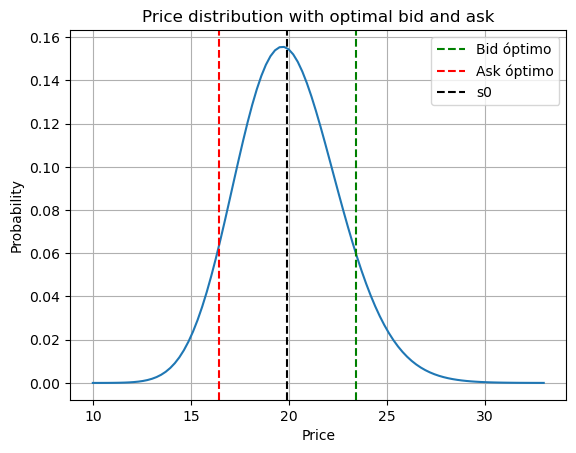

In [5]:
plt.plot(s, pdf(s))
plt.axvline(res.x[0], color='g', linestyle='--', label='Bid óptimo')
plt.axvline(res.x[1], color='r', linestyle='--', label='Ask óptimo')
plt.axvline(s0, color='k', linestyle='--', label='s0')
plt.title('Price distribution with optimal bid and ask')
plt.xlabel('Price')
plt.ylabel('Probability')
plt.legend()
plt.grid()
plt.show()